In [1]:
# Could maybe do path collection
# Circle with fill='None'
# 5xhexagon with fill='None
# 6xpentagon with fill='black'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
%matplotlib inline
np.set_printoptions(suppress=True)
#pd.options.display.float_format = '{:.2f}'.format

https://matplotlib.org/users/path_tutorial.html

In [3]:
pentagon = mpath.Path.unit_regular_polygon(5)
hexagon = mpath.Path.unit_regular_polygon(6)
circle = mpath.Path.unit_circle()

In [4]:
pentagon_vertices = pentagon.vertices
pentagon_codes = pentagon.codes
circle_vertices = circle.vertices
circle_codes = circle.codes
hexagon_vertices = hexagon.vertices
hexagon_codes = hexagon.codes

In [5]:
hexagon_len = ((hexagon_vertices[0,0] - hexagon_vertices[1,0])**2+
               (hexagon_vertices[0,1] - hexagon_vertices[1,1])**2)**(0.5)

In [6]:
pentagon_len = ((pentagon_vertices[0,0] - pentagon_vertices[1,0])**2+
                (pentagon_vertices[0,1] - pentagon_vertices[1,1])**2)**(0.5)

In [7]:
scale_hexagon = 0.3
scale_pentagon = scale_hexagon*hexagon_len/pentagon_len

In [8]:
hexagon_vertices = hexagon_vertices * scale_hexagon
pentagon_vertices =pentagon_vertices * scale_pentagon

In [9]:
shift1 = pentagon_vertices[0,:] - hexagon_vertices[2,:]
hexagon_vertices1 = hexagon_vertices + shift1
shift2 = pentagon_vertices[0,:] - hexagon_vertices[4,:]
hexagon_vertices2 = hexagon_vertices + shift2
shift3 = pentagon_vertices[1,:] - hexagon_vertices[5,:]
hexagon_vertices3 = hexagon_vertices + shift3
shift4 = pentagon_vertices[3,:] - hexagon_vertices[2,:]
hexagon_vertices4 = hexagon_vertices + shift4

In [10]:
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle_vertices, hexagon_vertices1, pentagon_vertices,hexagon_vertices2,
                        hexagon_vertices3,hexagon_vertices4])
codes = np.concatenate([circle_codes, hexagon_codes, pentagon_codes,hexagon_codes, hexagon_codes,
                       hexagon_codes])
football = mpath.Path(verts, codes)

In [11]:
curve_offset = 0.03
difference = np.vstack([hexagon_vertices[1:],hexagon_vertices[0]]) - hexagon_vertices[0:]
hexagon_vertices = np.repeat(hexagon_vertices,2,axis=0)
hexagon_vertices[1::2] = hexagon_vertices[1::2] + difference/2
hexagon_vertices[1,0] = hexagon_vertices[1,0] - curve_offset
hexagon_vertices[1,1] = hexagon_vertices[1,1] + curve_offset
hexagon_vertices[3,0] = hexagon_vertices[3,0] - curve_offset
hexagon_vertices[5,:] = hexagon_vertices[5,:] - curve_offset
hexagon_vertices[7,0] = hexagon_vertices[7,0] + curve_offset
hexagon_vertices[7,1] = hexagon_vertices[7,1] - curve_offset
hexagon_vertices[9,0] = hexagon_vertices[9,0] + curve_offset
hexagon_vertices[11,:] = hexagon_vertices[11,:] + curve_offset
hexagon_codes = np.repeat(hexagon_codes,2)
hexagon_codes[1] = 3
hexagon_codes[3] = 3
hexagon_codes[5] = 3
hexagon_codes[7] = 3
hexagon_codes[9] = 3
hexagon_codes[11] = 3
hexagon_codes[-2] = 2
hexagon = mpath.Path(hexagon_vertices,hexagon_codes)

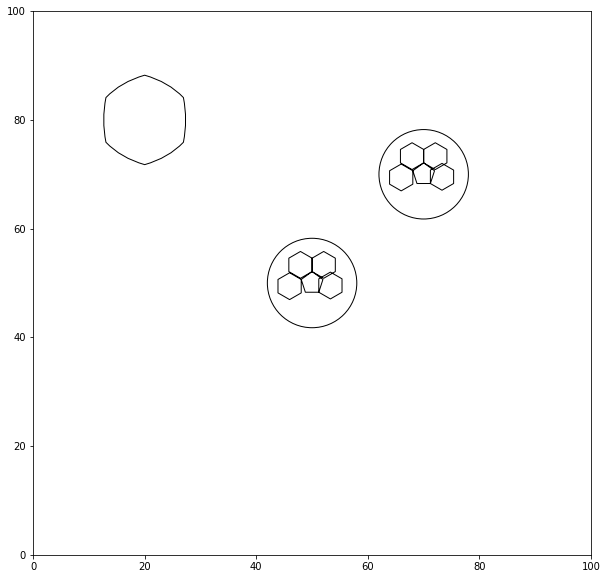

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter([50,70],[50,70], s=8000, marker=football,edgecolors="black", facecolors='none', linewidth=1)
ax.scatter([20],[80], s=8000, marker=hexagon,edgecolors="black", facecolors='none', linewidth=1)
ax.set_xlim(0,100);ax.set_ylim(0,100);